In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
path = "example.txt"

with open(path) as f:
    display(f.readline())

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [45]:
with open(path) as f:
    records = [json.loads(lines) for lines in f]


In [119]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

In [14]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'America/New_York',
 'America/Denver',
 'Europe/Rome',
 'Africa/Ceuta',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Europe/Madrid',
 'Asia/Kuala_Lumpur',
 'Asia/Nicosia',
 'America/Sao_Paulo',
 '',
 '',
 'Europe/London',
 'America/New_York',
 'Pacific/Honolulu',
 'America/Chicago',
 '',
 '',
 'Pacific/Honolulu',
 '',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/Chicago',
 'Europe/Rome',
 'America/New_York',
 'America/New_York',
 'America/Los_Angeles',
 '',
 '',
 'America/New_York',
 'America/New_York',
 'Europe/Malta',
 'America/New_York',
 'America/New_York',
 '',
 'America/Los_Angeles',
 'America/Sao_Paulo',
 '',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'Paci

In [31]:
print(len(time_zones))

def get_counts(sequence):
 counts = {}
 for x in sequence:
    if x in counts:
        counts[x] += 1
    else:
        counts[x] = 1
 return counts



3440


In [34]:
counts = get_counts(time_zones)
counts['America/New_York']



1251

In [35]:
counts

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Continental': 6,
 

In [42]:
def top_countries(count_dict, n=10):
    pairs = [(count,tz) for tz, count in count_dict.items()]
    pairs.sort()
    return pairs[-n:]
   

In [43]:
countries = top_countries(counts,10)
countries


[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

### Another way to do with python standard liberies 

In [44]:
from collections import Counter

count = Counter(time_zones)
count.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## Now Using Pandas to do this 

In [46]:
frame = pd.DataFrame(records)
frame.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [48]:
frame['tz'].value_counts().head(10)

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: count, dtype: int64

### Now Check Info Of the data to check The missing Values


In [49]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [50]:
frame.isna().sum()

a               120
c               641
nk              120
tz              120
gr              641
g               120
h               120
l               120
al              466
hh              120
r               120
u               120
t               120
hc              120
cy              641
ll              641
_heartbeat_    3440
kw             3467
dtype: int64

In [51]:


3440 + 120


3560

In [55]:
clean_tz = frame['tz'].fillna("Missing")
clean_tz[clean_tz == ''] = "unknown"
tz_counts = clean_tz.value_counts()
tz_counts

tz
America/New_York        1251
unknown                  521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Europe/Uzhgorod            1
Australia/Queensland       1
Europe/Sofia               1
America/Costa_Rica         1
America/Tegucigalpa        1
Name: count, Length: 98, dtype: int64

In [53]:
clean_tz

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

### Top Time Zones in USA Data

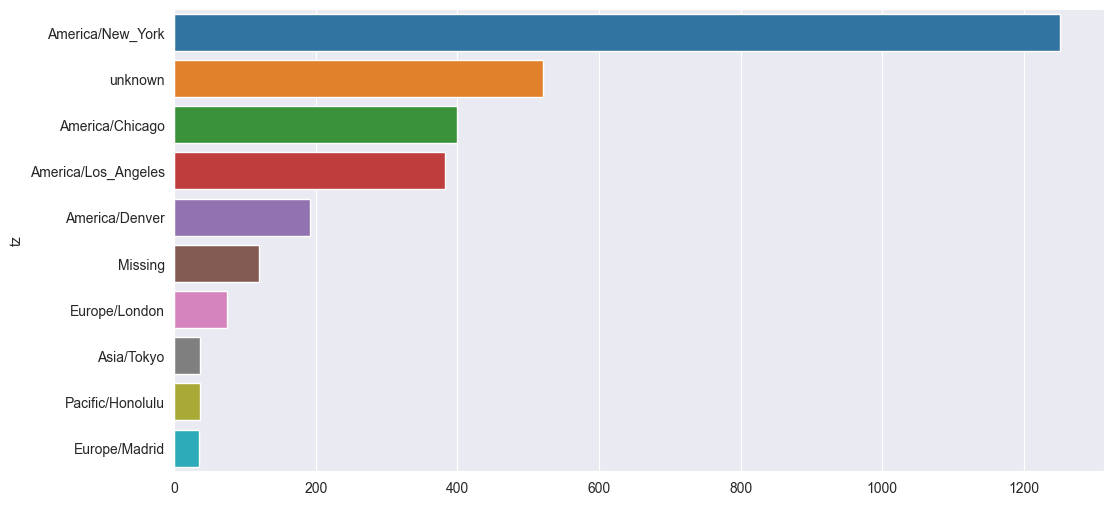

In [61]:
subset = tz_counts.head(10)
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.barplot(y=subset.index, x=subset.to_numpy(),
            hue=subset.index)

plt.show()


In [73]:
frame['a'][0]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11'

In [68]:
frame["a"][51][:10]

'Mozilla/5.'

In [70]:
result = pd.Series([x.split()[0] for x in frame['a'].dropna()])
result

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
                 ...          
3435               Mozilla/4.0
3436               Mozilla/5.0
3437    GoogleMaps/RochesterNY
3438            GoogleProducer
3439               Mozilla/4.0
Length: 3440, dtype: object

In [75]:
result.value_counts().head(10)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
Name: count, dtype: int64

In [78]:
cframe = frame[frame["a"].notna()].copy()
cframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3440 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  0 non-null      float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 510.6+ KB


In [81]:
cframe['os'] = np.where(cframe['a'].str.contains("Windows"),"Windows","Not Windows")
cframe

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Not Windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN,Windows
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN,Windows
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN,Not Windows


In [96]:
difference = cframe['os'].value_counts()
difference

os
Windows        2246
Not Windows    1194
Name: count, dtype: int64

In [103]:
df_frame = difference.to_frame()
df_frame

,count
os,
Windows,2246
Not Windows,1194


### Windows Users and Non Windows Users

<Axes: xlabel='count', ylabel='os'>

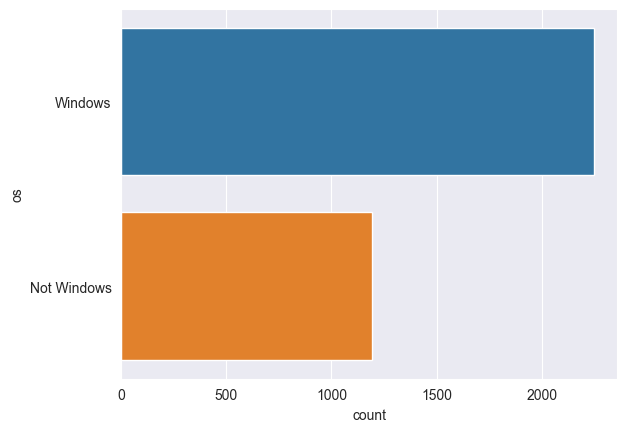

In [104]:
sns.barplot(x='count', y='os',
            hue='os',data=df_frame)

In [86]:
tz_of_os = cframe.groupby(["tz","os"])

agg_count = tz_of_os.size().unstack().fillna(0)
agg_count.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [88]:
indexer = agg_count.sum("columns").argsort()
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55])

In [89]:
count_subset = agg_count.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [90]:
agg_count.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [91]:
count_subset = count_subset.stack()
count_subset

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
dtype: float64

In [93]:
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head()

,index,tz,os,total
0,0,America/Sao_Paulo,Not Windows,13.0
1,1,America/Sao_Paulo,Windows,20.0
2,2,Europe/Madrid,Not Windows,16.0
3,3,Europe/Madrid,Windows,19.0
4,4,Pacific/Honolulu,Not Windows,0.0


### Creating a bar plot for better understanding the grouped data of count_subset

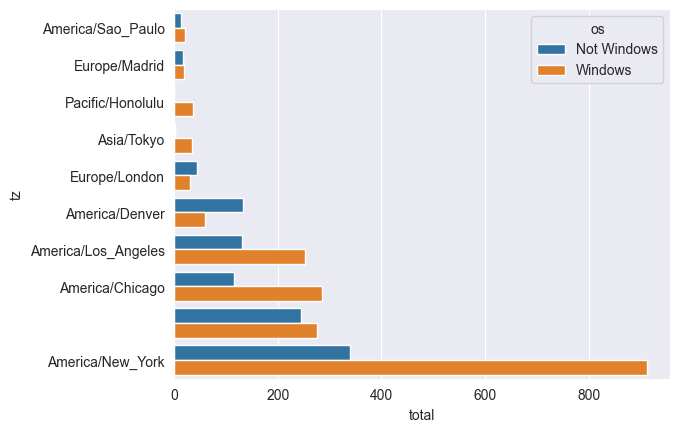

In [95]:
sns.barplot(x='total', y='tz',hue='os', data=count_subset)
plt.show()

In [115]:
def norm_total(group):
 group["normed_total"] = group["total"] / group["total"].sum()
 return group

results = count_subset.groupby("tz").apply(norm_total)
results


C:\Users\wtc\AppData\Local\Temp\ipykernel_11384\3532731184.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


index                   tz           os  total  \
tz                                                                       
                    16     16                       Not Windows  245.0   
                    17     17                           Windows  276.0   
America/Chicago     14     14      America/Chicago  Not Windows  115.0   
                    15     15      America/Chicago      Windows  285.0   
America/Denver      10     10       America/Denver  Not Windows  132.0   
                    11     11       America/Denver      Windows   59.0   
America/Los_Angeles 12     12  America/Los_Angeles  Not Windows  130.0   
                    13     13  America/Los_Angeles      Windows  252.0   
America/New_York    18     18     America/New_York  Not Windows  339.0   
                    19     19     America/New_York      Windows  912.0   
America/Sao_Paulo   0       0    America/Sao_Paulo  Not Windows   13.0   
                    1       1    America/Sao_Paulo      Windows   20.0   
Asia/Tokyo          6       6           Asia/Tokyo  Not Windows    2.0   
                    7       7           Asia/Tokyo      Windows   35.0   
Europe/London       8       8        Europe/London  Not Windows   43.0   
                    9       9        Europe/London      Windows   31.0   
Europe/Madrid       2       2        Europe/Madrid  Not Windows   16.0   
                    3       3        Europe/Madrid      Windows   19.0   
Pacific/Honolulu    4       4     Pacific/Honolulu  Not Windows    0.0   
                    5       5     Pacific/Honolulu      Windows   36.0   

                        normed_total  
tz                                    
                    16      0.470250  
                    17      0.529750  
America/Chicago     14      0.287500  
                    15      0.712500  
America/Denver      10      0.691099  
                    11      0.308901  
America/Los_Angeles 12      0.340314  
                    13      0.659686  
America/New_York    18      0.270983  
                    19      0.729017  
America/Sao_Paulo   0       0.393939  
                    1       0.606061  
Asia/Tokyo          6       0.054054  
                    7       0.945946  
Europe/London       8       0.581081  
                    9       0.418919  
Europe/Madrid       2       0.457143  
                    3       0.542857  
Pacific/Honolulu    4       0.000000  
                    5       1.000000

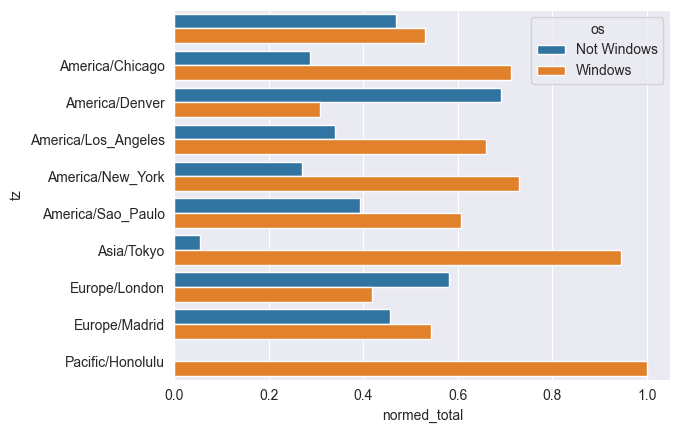

In [111]:
sns.barplot(x="normed_total", y="tz", hue="os", data=results)
plt.show()